# <img src="http://pyntacle.css-mendel.it/images/logo_simpler-u708-fr3.png" align="left"/> Case Study  3:  A group-based analysis of the *C. elegans* connectome

<br>
<br>

*Pyntacle version: 1.0*

---

# Table of Contents
- [Introduction](#intro)
- [Data description and network loading](#data)
- [The connectome as a *rich club* of neurons](#rich)
- [Evaluate the group centrality of the rich club core](#gc)
- [Group search of alternative groups of nodes that maximize group degree](#go)
- [Explore the hierarchy of nested groups inside the rich club using group degree](#nest)
- [Conclusions](#concl)
- [Appendix - Save the binary final graph for later use ](#bin)



**Note to the reader**: the purpose of these case studies is not scientific, but demonstrative of the functionalities of Pyntacle.

---

## Introduction <a id="intro"></a>

---
This case study revolves around the network-based analysis of the first (and most detailed) wiring diagram (also known as [connectome](https://en.wikipedia.org/wiki/Connectome)) of the neuronal connections of a fairly complex multicellular organism, the small nematode *Caenorhabditis elegans*. This systems has been widely studied, even resorting to [Graph Theory](https://en.wikipedia.org/wiki/Graph_theory), to identify emergent properties of neurons (see, for example, the articles by [Towlson et al.](https://doi.org/10.1523/JNEUROSCI.3784-12.2013) and by [Bentley et al.]( https://doi.org/10.1523/JNEUROSCI.3784-12.2013)). Topological analysis of the connections among neurons contributed to understand the spatial architecture and many biological features of this neuronal system, and thus to hypothesize that these and other evidences might be applied also to more complex neuronal systems, such as those of mammalians. This topic is today [an open debate](https://www.scientificamerican.com/article/c-elegans-connectome/). Albeit been widely characterized, there is a gap in the understanding of the role that groups of neurons (*nodes*, in the connectome) play within the whole network. Topological metrics tailored to the assessment of the importance of groups of nodes, such as the one proposed by [Borgatti and Everett](https://doi.org/10.1080/0022250X.1999.9990219), could cover this gap.

This case study takes inspiration from the study of [Towlson et al.](https://doi.org/10.1523/JNEUROSCI.3784-12.2013), that identified a *rich club* in the connectome as the group of top-ranked neurons in terms of their local centrality. We will make use of the Pyntacle's Python library to first replicate the findings of Towlson and, then, to identify other topologically important groups of nodes, possibly including the rich club's members.

In brief, we will:
1. Load the connectome into a Python interactive environment.
2. Compare our connectome with the one published [here](https://doi.org/10.1523/JNEUROSCI.3784-12.2013). 
3. Study the rich club of neurons by means of *group-based* centrality indices.
4. Explore the possibility that other groups of neurons smaller or than, as big as, the rich club exist that exhibit higher group centrality values.
5. Search for important subgroups of the rich club.

And finally:

6. Save the connectome to a graph object for later use.

All the data of this case study are available as an archive [here](http://pyntacle.css-mendel.it/resources/tutorials/cs3/Pyntacle_CS3.zip), along with a [Python script](http://pyntacle.css-mendel.it/resources/tutorials/cs3/cs3.py) that contains all commands necessary to repeat this analysis outside of this notebook.

We recommend the reader to have a look at our [short introduction](http://pyntacle.css-mendel.it/resources/kp_guide/kp_guide.html) on group-centrality indices and to our [Pyntacle Quick Start guide](http://pyntacle.css-mendel.it/resources/tutorials/startup_guide/Quick%20Start%20Guide.html) before reading this case study, to get acquainted with the metrics that will be used here and with some of the basic Pyntacle library functionalities.

## Data description and  network loading <a id="data"></a>

---

We will make use of the neuronal wiring diagram of the hermaphrodite *C. elegans* that was firstly described in the paper by [Varshney et al.]( https://doi.org/10.1371/journal.pcbi.1001066). It was downloaded from the WormAtlas database on July 2018. (http://www.wormatlas.org/neuronalwiring.html, section 2.1)

The neuronal wiring file consists of pairs of neurons per line, the synapse type (i.e., *sending*, *receiver*), and other ancillary information. The original connection map is made of 283 neurons and 6415 connections. We turned them to a demultiplexed graph by first collapsing multiple connections among neruons into one link (disregarding of their direction). Moreover, we discarded all links representing the neuro-muscular junctions (*NMJ*) or involving the node named *NMJ*, as it is a placeholder for the final muscular stimuli, and retained only the links classified as *sending* (*S, Sp*) and *receivers* (*R, Rp*). The resulting network is available [here](http://pyntacle.css-mendel.it/resources/tutorials/cs3/CAEEL_Connectome.sif) as a SIF file (see the [file formats guide](http://pyntacle.css-mendel.it/resources/file_formats/file_formats.html) for a full description of the SIF format). The final graph consists of 279 nodes, 1960 edges and has a single component.

Assuming that the Python console (or an interactive notebook) is in the same directory of the connectome file, we can easily import it into Pyntacle as an `igraph.Graph` object with the following command:

In [36]:
from pyntacle.io_stream.importer import PyntacleImporter as pyimp
graph = pyimp.Sif("CAEEL_Connectome.sif")

SIF from CAEEL_Connectome.sif imported


The graph summary shows the correct number of nodes and edges, plus a series of attributes, described in our [minimum requirements](http://pyntacle.css-mendel.it/requirements.html) page, which are initialized when importing the graph.

In [37]:
graph.summary()

"IGRAPH UN-- 279 1960 -- ['CAEEL_Connectome']\n+ attr: implementation (g), isolates (g), name (g), sif_interaction_name (g), name (v), parent (v), adjacent_nodes (e), sif_interaction (e)"

## The connectome as a *rich club* of neurons <a id="rich"></a>

---

The graph of the worm connectome is similar to a [Small-world network](https://en.wikipedia.org/wiki/Small-world_network), with a high number of connections between neighboring neurons and short distances among all neurons. These properties can be checked by means of `Octopus`: the interface between igraph and Pyntacle. `Octopus` aims at relieving the user from the burden of computing topological indices and assigning their values to the `Graph` object or to the nodes and edges manually. 

By means of `Octopus`, we will first check the *average node degree* and the *average shortest path lengths* of the connectome:

In [38]:
from tools.octopus import Octopus

Octopus.average_degree(graph)
Octopus.average_global_shortest_path_length(graph)

Calculating the average degree and storing in the graph 'average_degree' attribute.
Graph attribute average_degree added
Calculating the average among all graph geodesics and storing in the graph 'average_global_shortest_path_length' attribute.
Graph attribute average_global_shortest_path_length added


The results of these methods are automatically labeled as `average_degree` and `average_global_shortest_path_length`, respectively, and added to the graph as graph attributes. 

**Note** that `average_global_shortest_path_length` differs from `average_shortest_path_length` as it averages all the geodesics among any node pairs in the graph, while the latter computes the average distance from a specific node to the other nodes of a graph.

From their values:

In [39]:
graph["average_degree"]
graph["average_global_shortest_path_length"]

14.05018

2.57002

we can notice high degree, in the average, and short paths between nodes. As anticipated, these are peculiar characteristics of small-world systems.

This connectome graph (as other real complex systems, see [Colizza et al](https://doi.org/10.1038/nphys209)) is partitioned into two guilds: a **rich club** of nodes, which is an elite clique of high-degree hubs, and a large poor periphery.

In their paper, Towlson et al. identified a rich club within the *C. elegans* connectome made by 287 neurons and 2287 synaptic connections. It is worth noticing that this connectome has 352 more connections than our connectome model, since we removed all the connections representing the electric junctions (*EJ*). We will explore the impact of this choice later in this chapter.

The authors identified the rich club by normalizing the degree of the top-ranked nodes in the network over the degree of the top-ranked nodes in a 1000 random networks with the same number of nodes and edges than the connectome, thereby identifying the rich club of neurons as the one with at least one standard deviation (σ) over the rich club coefficient (we refer the reader to the [original paper](https://doi.org/10.1523/JNEUROSCI.3784-12.2013) for more details on this). In the end, the authors identified a group of 14 high-degree nodes, made exclusively by interneurons, with a strong deviation from the normalized rich club coefficient, thus choosing neurons whose degree in the network strongly differs from their random counterparts. They are described in the following table:

| Neuron ID | $$\it{k_T}$$ | *Rich Club* | Function |
| :--- | --- | --- | --- |
| AVAR | 94 | 3σ | Head interneuron; role in locomotor decisions |
| AVAL | 93 | 3σ | Head interneuron; role in locomotor decisions |
| AVBL | 76 | 3σ | Head interneuron; role in locomotor decisions |
| AVBR | 75 | 3σ | Head interneuron; role in locomotor decisions |
| AVER | 57 | 3σ | Head interneuron; role in locomotor decisions |
| AVDR | 56 | 3σ | Head interneuron; role in locomotor decisions |
| AVEL | 56 | 3σ | Head interneuron; role in locomotor decisions |
| PVCL | 55 | 3σ | Head interneuron; role in locomotor decisions |
| PVCR | 53 | 3σ | Head interneuron; role in locomotor decisions |
| DVA | 51 | 3σ | Head interneuron; role in locomotor decisions |
| AVDL | 45 | 3σ | Head interneuron; role in locomotor decisions |
| AIBR | 39 | 2σ | Head interneuron |
| RIBL | 38 | 1σ | Head interneuron |
| RIAR | 37 | 1σ | Head interneuron |

Where $\it{k_T}$ is the degree of the neurons evaluated by Towlson et al. and the *Rich Club* column reports the distance, expressed in standard deviations from their random counterpart. This allows to identify a core of 11 neurons that are at at least 3 times the standard deviation (3σ) from the normalized rich club coefficient of the graph. This core is depicted in red when plotting the connectome with an external tool (Cytoscape), while the neurons distant 2σ and 1σ are depicted in orange and blue, respectively:

![cytoscapefigure](http://pyntacle.css-mendel.it/resources/tutorials/cs3/connectome.png)

As mentioned before, the absence of edges that represent the electric junctions in our dataset compared to the connectome model built by Towlson is remarkable. This difference may actually lead to different conclusions. One of these is that some of the rich club members may be deprived of meaningful connections that can be, in turn, detrimental in terms of topological centrality.

We can evaluate this difference by sorting by degree the nodes of our connectome and of the Towlson's connectome that belong to the rich club. We do this by means of the `degree` method of `Octopus`:

In [40]:
Octopus.degree(graph)

Calculating degree for all nodes and storing in the vertex 'degree' attribute.
Node attribute degree added


and then combine results into a [pandas](https://pandas.pydata.org/) `DataFrame`:

In [41]:
import pandas as pd
df = pd.DataFrame({"Degree":graph.vs["degree"]}, index=graph.vs["name"])
df = df.sort_values(by=["Degree"], ascending=False)

Looking at the top 14 neurons of the DataFrame:

In [42]:
df.head(14)

Degree
AVAR      85
AVAL      83
AVBL      56
AVDR      53
PVCL      52
AVBR      51
AVER      50
AVEL      50
PVCR      49
DVA       48
AVDL      42
RIAR      36
AIBR      34
RIAL      33

We notice that the top ranked degree nodes are the same except for **RIBL**, that is replaced by **HSNR** (a motor neuron, **$k_P$=XX**). Moreover, the degree rank slightly differs between the two. 

If we compare the degree of nodes of the rich club found by Towlson with that of nodes in our connectome, and measure their differences ($\Delta_k$), we obtain the following table:

|Neuron ID | $$\it{k_T}$$ | $$\it{k_P}$$| $$\Delta_k$$
| :--- | ---| --- | --- |
| AVAR | 94 | 85 | **8** |
| AVAL | 93 | 83 | **10** |
| AVBL | 76 | 56 | **10** |
| AVBR | 75 | 51 | **14** |
| AVER | 57 | 50 | **7** |
| AVDR | 56 | 53 | **3** |
| AVEL | 56 | 50 | **6** |
| PVCL | 55 | 52 | **3** |
| PVCR | 53 | 49 | **4** |
| DVA | 51 | 48 | **3** |
| AVDL | 45 | 42 | **3** |
| AIBR | 39 | 34 | **5** |
| RIBL | 38 | 26 | **8** |
| RIAR | 37 | 36 | **1** |

We can conclude that, despite the most connections loss regards the rich club core and not the other 3 members (AIBR, RIBL, RIAR), the small connection loss in our connectome model leads to as different ranking of the nodes in the connectome. Nevertheless, the top-ranked degree nodes are still the most informative neurones, the one belonging to the 3σ rich club "core". For this reason, we will focus our analysis from here on on this subgroup. 

## Evaluate the group centrality of the rich club core <a id="gc"></a>

---

While the conditions for defining a rich club are well-established, little is knwon on the centrality that the members of a rich club should hold in a network. This is crucial for assessing the overall importance of the rich club in the connectome and to further characterize its relevance. 

We can try to fill this gap here by measuring the group centrality of the rich club'members using the 3 group centrality indices implemented in Pyntacle, namely the *group degree*, the *group closeness* and the *group betweenness*. These are modified version of corresponding local centrality indices. The first measures the overall number of connections that a group has with respet to the rest of the graph, while the other 2 assess the centrality of a group by elaborating on its gedesics distance to the rest of the graph. They all range from 0 to 1, with values closer to 1 meaning a strong centrality of the group. To this aim, we will calculate the `group_degree`, `group_closeness` and `group_betwenness` as implemented in `Octopus`. 

We can first evaluate the group degree of the rich club core by typing:

In [43]:
#list that contains the names of the rich club nodes
rc = ["AVAR", "AVAL", "AVBL", 
      "AVBR", "AVER", "AVDR", 
      "AVEL", "PVCL", "PVCR", 
      "DVA", "AVDL"]

Octopus.group_degree(graph, rc)
#print the group degree attribute along with the node names
graph["group_degree_info"]

Calculating group degree for node set AVAL,AVAR,AVBL,AVBR,AVDL,AVDR,AVEL,AVER,DVA,PVCL,PVCR and storing in the vertex 'group_degree_info' attribute.
Initializing 'group_degree_info' attribute.
Graph attribute group_degree_info added


{('AVAL',
  'AVAR',
  'AVBL',
  'AVBR',
  'AVDL',
  'AVDR',
  'AVEL',
  'AVER',
  'DVA',
  'PVCL',
  'PVCR'): 0.63433}

**Note** that the name of the attribute that stores the group degree value of a predefined set of nodes contains the `info` suffix. This suffix will not be present in case the group degree will be calculated by one of the *optimization search* algorithms implemented in Pyntacle, since the set of nodes will not be predefined, but contextually found by the algorithms. 
**Note** also that all the metrics of groups will be stored as graph's attributes and thus as Python dictionaries, whose keys are tuples containing the node set, and their matching values being floats representing their group centrality values.

The normalized group degree coefficient of the rich club is 0.63433. Similarly, we can compute the group betwenness of the rich club:

In [44]:
Octopus.group_betweenness(graph, rc)

graph["group_betweenness_info"]

Calculating group betweenness for node set AVAL,AVAR,AVBL,AVBR,AVDL,AVDR,AVEL,AVER,DVA,PVCL,PVCR and storing in the vertex 'group_betweenness_info' attribute.
Initializing 'group_betweenness_info' attribute.
Graph attribute group_betweenness_info added


{('AVAL',
  'AVAR',
  'AVBL',
  'AVBR',
  'AVDL',
  'AVDR',
  'AVEL',
  'AVER',
  'DVA',
  'PVCL',
  'PVCR'): 0.27056}

And its group closeness:

In [45]:
Octopus.group_closeness(graph, rc)
graph["group_closeness_minimum_info"]

Calculating group closeness with a AVAL,AVAR,AVBL,AVBR,AVDL,AVDR,AVEL,AVER,DVA,PVCL,PVCR distance for node set group_closeness_minimum_info and storing in the vertex 'minimum' attribute.
Initializing 'group_closeness_minimum_info' attribute.
Graph attribute group_closeness_minimum_info added


{('AVAL',
  'AVAR',
  'AVBL',
  'AVBR',
  'AVDL',
  'AVDR',
  'AVEL',
  'AVER',
  'DVA',
  'PVCL',
  'PVCR'): 0.72826}

**Note** that the group closeness graph attribute name contains a further suffix, `minimum`. Since the group closeness is calculated as the sum of the inverse distances between a nodes set and the rest of the graph, you may be interested to the (default) minimum, maximum or average distance between the nodes set and the rest of the network. In our connectome, we have considered the minimum distances, as we are interested in the shortest possible communications between the group and the other neurons. 

Assembling all the three group centralities into a pandas `pd.DataFrame` object (downloadable as a tab-delimited file [here](./CS3_rich_club_groupcentralities.tsv)):

In [46]:
rc_ind = " ".join(rc)
rc_key = tuple(rc)

dfdict = {"group degree": graph["group_degree_info"][rc_key],
          "group betweenness": graph["group_betweenness_info"][rc_key],
          "group closeness (min)": graph["group_closeness_minimum_info"][rc_key]}


df = pd.DataFrame(dfdict, index=[rc_ind])

df

group degree  \
AVAL AVAR AVBL AVBR AVDL AVDR AVEL AVER DVA PVC...       0.63433   

                                                    group betweenness  \
AVAL AVAR AVBL AVBR AVDL AVDR AVEL AVER DVA PVC...            0.27056   

                                                    group closeness (min)  
AVAL AVAR AVBL AVBR AVDL AVDR AVEL AVER DVA PVC...                0.72826

We noted that, as a group, the rich club is central in terms of the overall distances between it and the rest of the graph, as the group exhibit considerably high values of group degree and closeness. Nevertheless, the group betwenness of the rich club is significantly low (0.27), meaning that, on overall, there is a low number of shortest paths that pass though the rich club core with respect to the rest of the nodes in the graph. This is expected, as we symmetrized the connections by eliminating the directionality of the edges. 

The group centrality values that we computed here are of course relative to the rich club. Hence, this does not exclude the presence of other groups, which are not strictly rich clubs, but that exhibit higher centrality values. In the next paragraph, we are going to search for other groups of nodes of the same size as the rich club that maximize the group degree of the connectome.

## Group search of alternative groups of nodes that maximize group degree <a id="go"></a>

---

We have anticipated that there may be other sets of nodes that, together, may exhibit even higher values of group degree. We can search for these groups using the *greedy optimization* search algorithm implemented in Pyntacle or directly using the `GO_group_degree` method (it will take some minute on a standard desktop) of `Octopus`. It will add a `group_degree_greedy` attribute to the graph. 

**Note** that this process will not necessarily return the best set (or sets) of nodes, as this algorithm is greedy and thus will not explore all the space of solutions. To do that, the user may want to call the `BF_group_degree` method instead, that launches a parallel, brute-force search. As a note of caution, please consider that a brute-force search may take longer than expected to finish its computation, especially when dealing with sets bigger than 5 nodes.

In [47]:
seed = 1
Octopus.GO_group_degree(graph, 11, seed=seed)

graph["group_degree_greedy"]

Optimal group: {AIBL, AVAR, AVHR, CEPVR, HSNL, PVCL, RIAL, RIH, RMDR, RMEL, VC03}
 Group size = 11
 Metric = group degree
 Score = 0.82836
Elapsed Time: 14.70 sec
Finding an optimal node set of size 11 for the group degree index using a greedily-optimized search and storing the set and its value in the 'group_degree_greedy' attribute.
Initializing 'group_degree_greedy' attribute.
Graph attribute group_degree_greedy added


{('AIBL',
  'AVAR',
  'AVHR',
  'CEPVR',
  'HSNL',
  'PVCL',
  'RIAL',
  'RIH',
  'RMDR',
  'RMEL',
  'VC03'): 0.82836}

We can notice that there is at least one set with a higher group degree (0.82836) than that of the rich club. This table reports the neurons, along with their functions and their degree ($k_P)$ values in the connectome:

| Neuron ID |$k_P$|Function |
| :--- | :---:| :---:|
| [AIBL](http://www.wormatlas.org/neurons/Individual%20Neurons/AIBframeset.html) | 32 | Interneuron |
| [AVAR](http://www.wormatlas.org/neurons/Individual%20Neurons/AVAframeset.html) | 85| Interneuron |
| [AVHR](http://www.wormatlas.org/neurons/Individual%20Neurons/AVHframeset.html) | 19 | Interneuron |
| [CEPVR](http://www.wormatlas.org/neurons/Individual%20Neurons/CEPframeset.html) | 48 | Sensory |
| [HSNL](http://www.wormatlas.org/neurons/Individual%20Neurons/HSNframeset.html)| 24 | Motor neuron |
| [PVCL](http://www.wormatlas.org/neurons/Individual%20Neurons/PVCframeset.html)| 52 | Ventral cord interneuron |
| [RIAL](http://www.wormatlas.org/neurons/Individual%20Neurons/R1Aframeset.html)| 33 | Sensory neuron |
| [RIH](http://www.wormatlas.org/neurons/Individual%20Neurons/RIHframeset.html)| 31 | Interneuron |
| [RMDR](http://www.wormatlas.org/neurons/Individual%20Neurons/RMDframeset.html)| 21 | Motor neuron |
| [RMEL](http://www.wormatlas.org/neurons/Individual%20Neurons/RMEframeset.html)| 9 |Motor neuron |
| [VC03](http://www.wormatlas.org/neurons/Individual%20Neurons/VCframeset.html)| 22 | Motor neuron |

Some of these neurons are part of the rich club (i.e., AVAR,  PVCL), while other "low-degree" nodes are spread across the network. However, these together contribute to obtaine a higher group degree than that of the rich club. Some of the neurons are not interneurons, rather they belong to the motor or sensory classes of neurons, implying that they can reach easily the network periphery. These nodes are highlighted in green in the graphic representation of our connectome model:

![cytoscapefigure](http://pyntacle.css-mendel.it/resources/tutorials/cs3/CS3_connectome_groupdegree.png)

With this, we can partially explain why the group degree of the rich club may not be the highest. The members of the rich club are well connected, if compared with other ndoes of the network. This elevate connectance among members is for sure optimal in terms of neural information exchange and robustness to external insults, but penalizes the rich club when considering it as a group.

This very preliminary study shows that computing the group degree can add additional layers of information about the struture of neuronal networks.

## Explore the hierarchy of nested groups inside the rich club using group degree <a id="nest"></a>

In the last part of this case study, we focus on another question concerning the rich club and its group degree: does each node in the rich club contribute equally to the group degree of the rich club? In other terms, is there any *nested* subset of nodes of size $k$ that exhibits a higher group degree value than the group degree values calculated for all the other groups of neurons of same size?

Only for demonstrative purposes, we will calculate the group degree values of all sets of 3 neurons ($k=3$):

In [48]:
import itertools
rc_shuffled = [list(x) for x in itertools.combinations(rc, 3)]

for elem in rc_shuffled:
    Octopus.group_degree(graph, elem)

graph["group_degree_info"]

Calculating group degree for node set AVAL,AVAR,AVBL and storing in the vertex 'group_degree_info' attribute.
Updating the 'group_degree_info' attribute.
Calculating group degree for node set AVAL,AVAR,AVBR and storing in the vertex 'group_degree_info' attribute.
Updating the 'group_degree_info' attribute.
Calculating group degree for node set AVAL,AVAR,AVDL and storing in the vertex 'group_degree_info' attribute.
Updating the 'group_degree_info' attribute.
Calculating group degree for node set AVAL,AVAR,AVDR and storing in the vertex 'group_degree_info' attribute.
Updating the 'group_degree_info' attribute.
Calculating group degree for node set AVAL,AVAR,AVEL and storing in the vertex 'group_degree_info' attribute.
Updating the 'group_degree_info' attribute.
Calculating group degree for node set AVAL,AVAR,AVER and storing in the vertex 'group_degree_info' attribute.
Updating the 'group_degree_info' attribute.
Calculating group degree for node set AVAL,AVAR,DVA and storing in the verte

{('AVAL',
  'AVAR',
  'AVBL',
  'AVBR',
  'AVDL',
  'AVDR',
  'AVEL',
  'AVER',
  'DVA',
  'PVCL',
  'PVCR'): 0.63433,
 ('AVAL', 'AVAR', 'AVBL'): 0.44928,
 ('AVAL', 'AVAR', 'AVBR'): 0.43478,
 ('AVAL', 'AVAR', 'AVDL'): 0.3913,
 ('AVAL', 'AVAR', 'AVDR'): 0.41667,
 ('AVAL', 'AVAR', 'AVEL'): 0.44565,
 ('AVAL', 'AVAR', 'AVER'): 0.44565,
 ('AVAL', 'AVAR', 'DVA'): 0.44928,
 ('AVAL', 'AVAR', 'PVCL'): 0.44565,
 ('AVAL', 'AVAR', 'PVCR'): 0.4529,
 ('AVAL', 'AVBL', 'AVBR'): 0.41304,
 ('AVAL', 'AVBL', 'AVDL'): 0.40217,
 ('AVAL', 'AVBL', 'AVDR'): 0.42029,
 ('AVAL', 'AVBL', 'AVEL'): 0.4529,
 ('AVAL', 'AVBL', 'AVER'): 0.46739,
 ('AVAL', 'AVBL', 'DVA'): 0.46377,
 ('AVAL', 'AVBL', 'PVCL'): 0.44565,
 ('AVAL', 'AVBL', 'PVCR'): 0.44928,
 ('AVAL', 'AVBR', 'AVDL'): 0.38768,
 ('AVAL', 'AVBR', 'AVDR'): 0.40942,
 ('AVAL', 'AVBR', 'AVEL'): 0.4529,
 ('AVAL', 'AVBR', 'AVER'): 0.4529,
 ('AVAL', 'AVBR', 'DVA'): 0.46739,
 ('AVAL', 'AVBR', 'PVCL'): 0.44203,
 ('AVAL', 'AVBR', 'PVCR'): 0.4529,
 ('AVAL', 'AVDL', 'AVDR'):

We can then store results in a pandas `DataFrame` and sort the group degree values of each set in descending order:

In [49]:
gd = graph["group_degree_info"]
gd = gd.values()

df = pd.DataFrame({"node set":["_".join(x) for x in graph["group_degree_info"].keys()], "group degree": list(gd)})
df = df.sort_values(by="group degree", ascending=False)
df

node set  group degree
0    AVAL_AVAR_AVBL_AVBR_AVDL_AVDR_AVEL_AVER_DVA_PV...       0.63433
42                                      AVAL_AVER_PVCR       0.48188
73                                       AVAR_AVEL_DVA       0.47464
37                                       AVAL_AVEL_DVA       0.47464
51                                       AVAR_AVBL_DVA       0.47101
49                                      AVAR_AVBL_AVEL       0.47101
39                                      AVAL_AVEL_PVCR       0.47101
22                                       AVAL_AVBR_DVA       0.46739
41                                      AVAL_AVER_PVCL       0.46739
40                                       AVAL_AVER_DVA       0.46739
14                                      AVAL_AVBL_AVER       0.46739
58                                       AVAR_AVBR_DVA       0.46377
52                                      AVAR_AVBL_PVCL       0.46377
15                                       AVAL_AVBL_DVA       0.46377
74                                      AVAR_AVEL_PVCL       0.46014
38                                      AVAL_AVEL_PVCL       0.46014
75                                      AVAR_AVEL_PVCR       0.46014
56                                      AVAR_AVBR_AVEL       0.45652
50                                      AVAR_AVBL_AVER       0.45652
13                                      AVAL_AVBL_AVEL       0.45290
20                                      AVAL_AVBR_AVEL       0.45290
21                                      AVAL_AVBR_AVER       0.45290
24                                      AVAL_AVBR_PVCR       0.45290
53                                      AVAR_AVBL_PVCR       0.45290
9                                       AVAL_AVAR_PVCR       0.45290
17                                      AVAL_AVBL_PVCR       0.44928
76                                       AVAR_AVER_DVA       0.44928
59                                      AVAR_AVBR_PVCL       0.44928
7                                        AVAL_AVAR_DVA       0.44928
43                                       AVAL_DVA_PVCL       0.44928
..                                                 ...           ...
25                                      AVAL_AVDL_AVDR       0.36232
91                                      AVBL_AVDL_AVER       0.36232
84                                      AVBL_AVBR_AVEL       0.36232
144                                      AVDL_DVA_PVCR       0.36232
88                                      AVBL_AVBR_PVCR       0.36232
164                                     AVER_PVCL_PVCR       0.35870
161                                     AVEL_PVCL_PVCR       0.35870
85                                      AVBL_AVBR_AVER       0.35870
143                                      AVDL_DVA_PVCL       0.35870
146                                     AVDR_AVEL_AVER       0.35507
61                                      AVAR_AVDL_AVDR       0.35507
114                                     AVBR_AVDL_PVCL       0.35507
121                                     AVBR_AVEL_AVER       0.35507
109                                     AVBL_PVCL_PVCR       0.35145
83                                      AVBL_AVBR_AVDR       0.34783
111                                     AVBR_AVDL_AVEL       0.34783
133                                      AVDL_AVDR_DVA       0.34420
130                                     AVBR_PVCL_PVCR       0.34420
112                                     AVBR_AVDL_AVER       0.34058
155                                     AVDR_PVCL_PVCR       0.33696
135                                     AVDL_AVDR_PVCR       0.33333
136                                     AVDL_AVEL_AVER       0.32971
134                                     AVDL_AVDR_PVCL       0.32971
89                                      AVBL_AVDL_AVDR       0.32971
131                                     AVDL_AVDR_AVEL       0.32246
145                                     AVDL_PVCL_PVCR       0.31522
82                                      AVBL

(The dataframe is available as tab delimited file [here](http://pyntacle.css-mendel.it/resources/tutorials/cs3/CS3_inner_groupdegree_RC.tsv))

At this point, we can plot the distribution of the group degree values of each set $h$, and compute mean and standard deviation values:

In [50]:
#import all the libraries for plotting
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [51]:
#load the dataset
df = pd.read_csv("CS3_inner_groupdegree_RC.tsv", sep="\t", index_col=0)
df.head()

group degree
node set                    
AVAL_AVER_PVCR       0.48188
AVAL_AVEL_DVA        0.47464
AVAR_AVEL_DVA        0.47464
AVAL_AVEL_PVCR       0.47101
AVAR_AVBL_AVEL       0.47101

<Figure size 1080x576 with 0 Axes>

[[], (-0.5, 10)]

(0, 1)

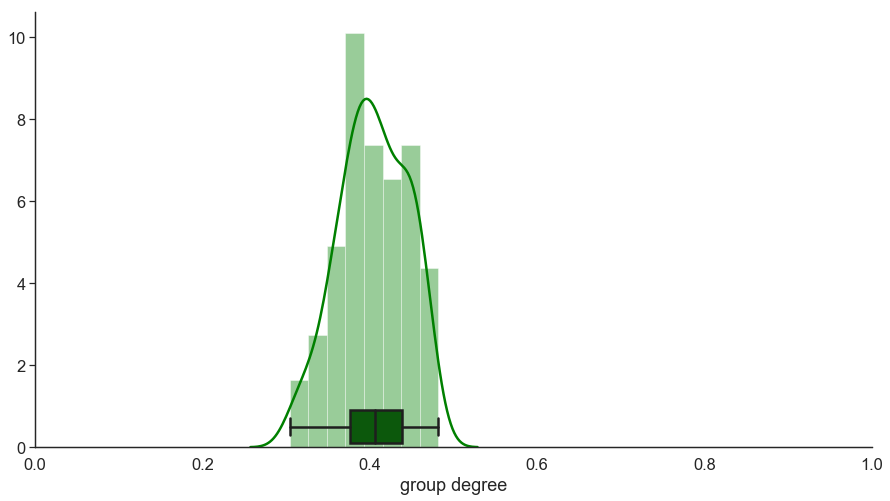

In [52]:
%matplotlib inline
plt.figure(figsize=(15,8))
sns.set_style('white')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.distplot(df["group degree"], rug=False, color="green")
ax2 = ax.twinx()
sns.boxplot(x=df["group degree"], ax=ax2, color="darkgreen")
ax2.set(ylim=(-0.5, 10), yticks = [])
sns.despine()
plt.xlim(0,1)

In [53]:
#compute the row mean and stdev
mean = df["group degree"].mean()
stdev = df["group degree"].std()
mean, stdev

(0.40399630303030304, 0.04096746743549501)

We can see here that the distribution of the group degree values for all sets of neurons of size 3 is quite homogeneous around its mean, 0.4, with a standard deviation of 0.04. If we look at the sets $h$ that are distant from this distribution and e xhibhit higher values of group degree, we notice that they always contains at least one among these 3 neurons: AVAR, AVAL and AVBR, the ones with the highest degree scores in ur connectome model. This may suggest that the group degree of these subsets is led by these nodes.

## Conclusions <a id="concl"></a>
---

In this case study, we analyzed the neuronal wiring diagram of the nematode *C. elegans*, through group centrality indices.

In the first part of the study, we compared our network model of the worm connectome with that made by Towlson et al. in a paper that dates back to 2013. By means of Pyntacle, we compared the degree values of the nodes belonging to the rich club and concluded that its core, which was made of 11 nodes, exhibited significantly high and comparable values of degree in both networks. We thus focused on the rich club core and computed its group centrality values, finding that on overall the rich club exhibits high values of *group closeness* and of *group degree*, but a low *group betweenness*. These findings remark that:

1. Hierarchically, the rich club is well-placed in the connectome, with a high *group closeness* value;
2. The symmetrization of the network penalizes the rich club in terms of *group betweenness*, since the majoriy of the shortest paths does not pass through it. Future versions of Pyntacle, which will account for directed and signed graphs, will be able to compute the *group betweenness* more precisely.

We then tried to find other interesting sets of neurons with the same size of that of the rich club through a greedily-optimized search. Surprisingly, we found that at least one set, made of (almost totally) disconnected nodes, yielded a much higher *group degree* than that of the rich club. This is mainly due to the fact the the rich club is well-connected among its members, although it is not so well-connected with the rest of the network with respect to other sets of the same size. 

Finally, we investigated whether the *group degree* of the rich club is due to the equal contributions of all its components or of a subset of it. We computed the *group degree* of all sets of size 3 (arbitary choice) and showed that the *group degree* was almost comparable among all sets, with some subgroup exhibiting higher *group degree* values when including at least one of these 3 neurons: AVAR, AVAL and AVBR.

##  Appendix - Save the binary final graph for later use <a id="bin"></a>

---

Optionally, we can save the connectome as a `graph.Graph` object into a [pickle](https://docs.python.org/3/library/pickle.html) binary file, retaining all the indices computed with `Octopus`, by means of the `PyntacleExporter` class:

In [54]:
from pyntacle.io_stream.exporter import PyntacleExporter as pyexp

pyexp.Binary(graph, "CS3_binary.graph")

A file with the same name exists at CS3_binary.graph, will overwrite
Graph successfully exported to binary at full path:
/home/d.capocefalo/Dropbox/Research/BFX_Mendel/BFX Lab/Pyntacle/site_material/Case_Study_3/CS3_binary.graph


The file can be downloaded [here](http://pyntacle.css-mendel.it/resources/tutorials/cs3/CS3_binary.graph)

---
This concludes our case study 3. If you want to leave a feedback, please [contact us](http://pyntacle.css-mendel.it/#contacts).